This dataset has been got from [Kaggle](https://www.kaggle.com/).  
[Social Media and Mental Health Balance](https://www.kaggle.com/datasets/ayeshaimran123/social-media-and-mental-health-balance)

In [1]:
import pandas as pd
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

All the column headers.

In [2]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


The first five rows of data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


- There are 500 entries 0-499.
- There are no null values (good thing)
- Gender and Social_Media_Platform are categorical variables, rest are numeric

In [4]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


A brief statistical metadata about the dataset.

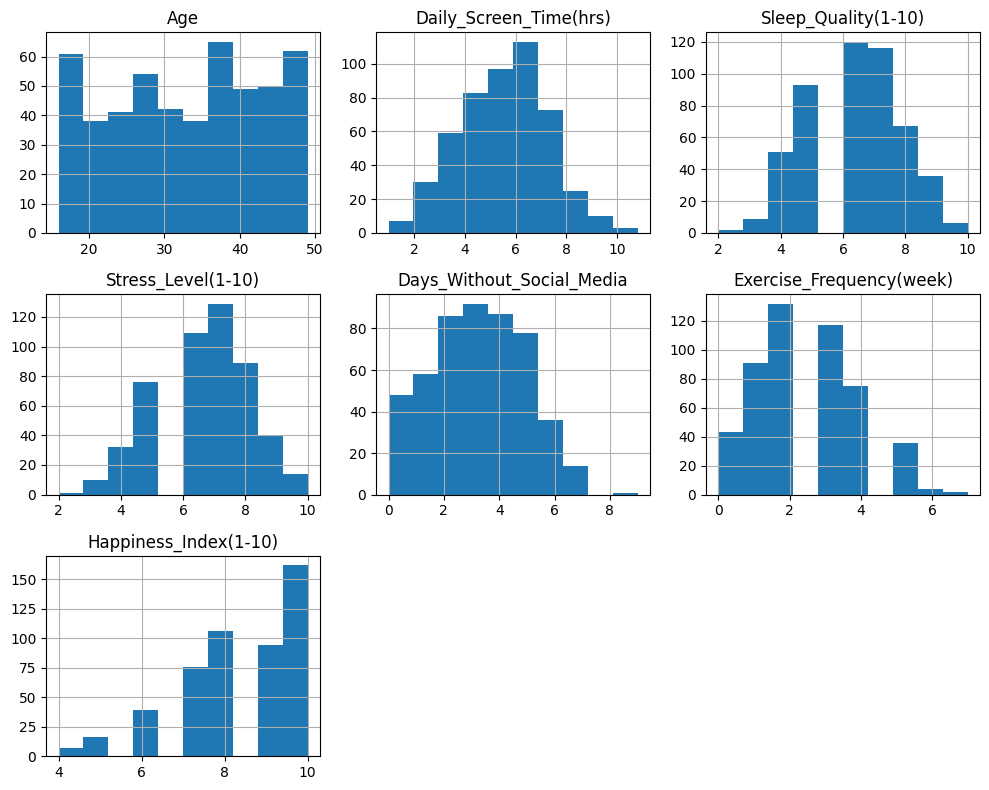

In [5]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

Histogram for all numeric columns.

In [6]:
df.select_dtypes(include=['number']).skew()

,0
Age,-0.121842
Daily_Screen_Time(hrs),0.034685
Sleep_Quality(1-10),0.031993
Stress_Level(1-10),-0.092911
Days_Without_Social_Media,0.079813
Exercise_Frequency(week),0.239954
Happiness_Index(1-10),-0.688802


Happiness_Index is moderately left skewed.  
There are more happy people in this dataset.

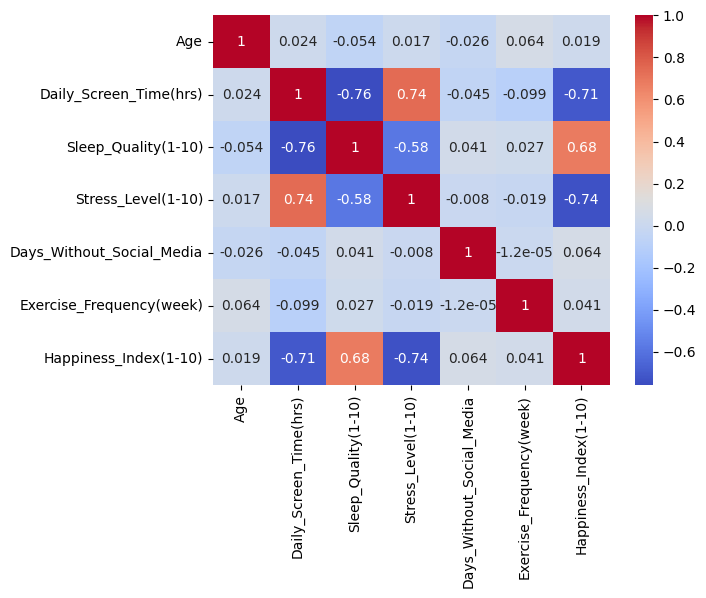

In [7]:
import seaborn as sns
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

Happiness_Index(1-10) is  
- Highly inversely correlated to Daily_Screen_Time(hrs)
- Highly correlated to Sleep_Quality(1-10)
- Highly inversely correlated to Stress_Level(1-10)

Regression will be used to predict the Happiness_Index(1-10) based on variables.

Preprocessing

Drop the User_ID column

In [8]:
df.drop(columns=['User_ID'], inplace=True)

In [9]:
df.head()

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


Encoding categorical variable Gender

In [10]:
df['Gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

Encoding categorical variable Social_Media_Platform

In [12]:
df['Social_Media_Platform'].unique()

array(['Facebook', 'LinkedIn', 'YouTube', 'TikTok', 'X (Twitter)',
       'Instagram'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['Social_Media_Platform'], drop_first=True)

In [14]:
df.head()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Male,Gender_Other,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,True,False,False,False,False,False,False
1,30,5.1,7.0,8.0,5.0,3.0,10.0,False,True,False,True,False,False,False
2,23,7.4,6.0,7.0,1.0,3.0,6.0,False,True,False,False,False,False,True
3,36,5.7,7.0,8.0,1.0,1.0,8.0,False,False,False,False,True,False,False
4,34,7.0,4.0,7.0,5.0,1.0,8.0,False,False,False,False,False,True,False


No Normalization because we are going to use a tree-based regressor